In [1]:
import glob
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import load_model
import numpy as np
import detect_slip_lines as dl
import cv2


In [2]:
# give the address to your image and the best model from indent_segmentation
path_to_image = ''
path_to_best_model = ''

In [79]:
new_model = tf.keras.models.load_model(path_to_best_model)

In [4]:
image_names = glob.glob(path_to_image + "/*.png")

In [5]:
len(image_names)

1120

In [33]:
num = np.random.randint(1,len(image_names))
image = dl.preprocess(image_names[num])
image.shape

(1, 768, 1024, 1)

In [34]:
y_pred=new_model.predict(image)
pred = (y_pred > 0.5).astype(np.uint8)

1/1 [==============================] - 0s 18ms/step


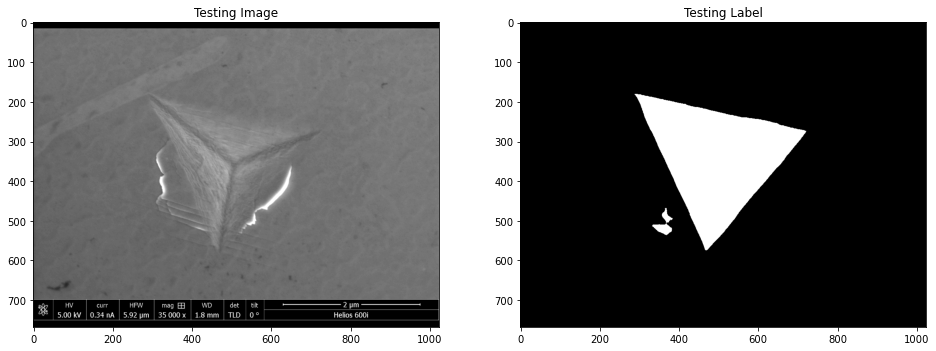

In [35]:
plt.figure(figsize=(16, 8))
plt.subplot(121)
plt.title('Testing Image')
plt.imshow(image[0,:, :, 0], cmap='gray')
plt.subplot(122)
plt.title('Testing Label')
plt.imshow(pred[0, :, :, 0], cmap='gray')

plt.show()

In [36]:
# convert shapes of image and predicted mask to H * W
prediction = np.reshape(pred, (768, 1024))
input_image = np.reshape(image, (768, 1024))



In [37]:
# find corners of the detected triangle
corners = dl.find_corners(prediction)


In [38]:
# find corners of quadratic regions of interest on the edges of the triangle
p1, p2, p3 = dl.edge_quad_points(corners, H=100)
# mask the image with regions of interest
maskimage = dl.region_of_interest(p1, p2, p3, input_image)

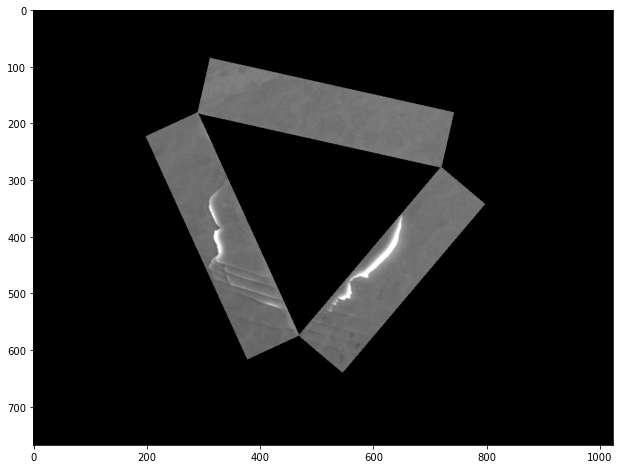

In [39]:
plt.figure(figsize=(16, 8))
plt.imshow(maskimage, cmap='gray')

In [76]:
# find slopes of lines in regions of interst, draw them on the image
img, lines, slopes = dl.detect_lines(
        maskimage,
        p1,p2,p3,
        gauss_k=5,
        low_th=30,
        high_th=70,
        min_vote=60,
        min_line_length=60,
        max_line_gap=10,
        atol_p=30,
        atol_m=5
    )


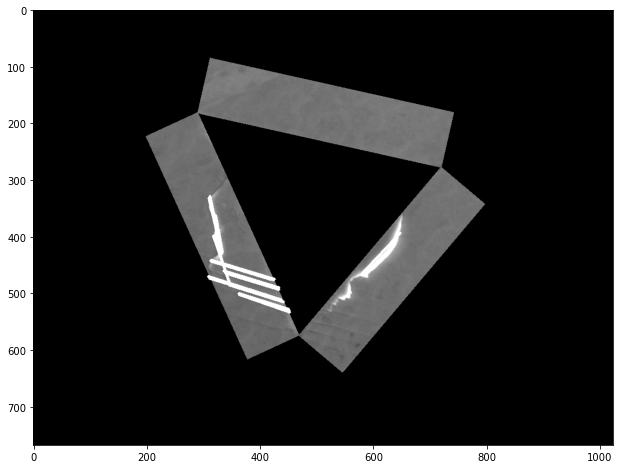

In [77]:
plt.figure(figsize=(16, 8))
plt.imshow(img, cmap='gray')

In [78]:
dl.write_slope(lines, slopes)